In [25]:
%%capture 
!python3 -m pip install google.cloud
!python3 -m pip install pandas
!python3 -m pip install numpy
!python3 -m pip install pyarrow

In [26]:
%matplotlib inline

import os
import pandas as pd
import numpy as np
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics
import pyarrow
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import figure
import random

In [27]:
# CONFIGURE THE BIGQUERY SETTINGS

BIGQUERY_PROJECT = 'ironhacks-covid19-data'
BIGQUERY_KEYPATH = 'service-account.json'

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = BIGQUERY_KEYPATH
bigquery_client = bigquery.Client(project=BIGQUERY_PROJECT)

In [35]:
#Select data

query = """
SELECT *
FROM ironhacks_covid19_competition.weekly_patterns
"""

query_job = bigquery_client.query(query)
df = query_job.to_dataframe()
df1 = df.groupby('top_category')['top_category'].count().sort_values(ascending=False)
# df1 = df1.reset_index()
df1 = df1.iloc[:5]
top_cat = df[df['top_category'].isin(df1.index)]
df.loc[~df["top_category"].isin(top_cat['top_category']), "top_category"] = "Others"
wk43 = df[df['week_number']==43]
wk = df[df['week_number'].isin([11,21,31,41])]
wk43['top_category']=wk43['top_category'].replace('Restaurants and Other Eating Places', 'Restaurants').replace('Museums, Historical Sites, and Similar Institutions', 'Museums').replace('Religious Organizations', 'Religious').replace('Automotive Repair and Maintenance', 'Auto Repair').replace('Other Amusement and Recreation Industries', 'Recreation')
top = ('Restaurants', 'Museums','Religious','Auto Repair', 'Recreation','Others')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# Places on the Map

### Location on Map with Visit Counts and Top Category for Week 43
For the graph below, I ploted the places with matching latitude and longitde for week 43. The different colors represent different categories and the sizes represents the number of visitores for that week. Since the difference between the visitors for places are very big, I averaged them out abit so that the graph shows as much place as possible.

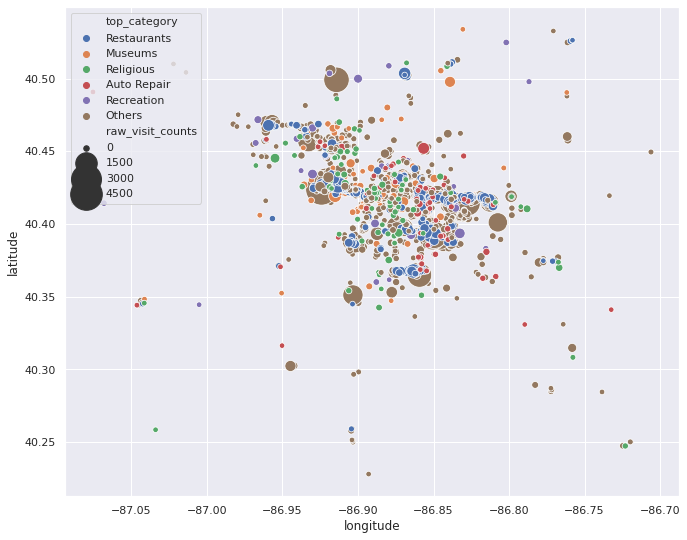

In [37]:
figure = sns.scatterplot('longitude', 'latitude', data=wk43, size ="raw_visit_counts", sizes=(30, 1000), hue="top_category", hue_order = top)

sns.set(rc={'figure.figsize':(20,9)})
plt.show()

### Campare Raw Visit Counts Throughout the Weeks on Map
The graph below shows the change in visitor numbers as weeks goes on. I zoomed in on Lafayette  and West Lafayette part so that the places are easier to see. We can see that over all, the amount fo visitors has increases. Especially for Purdue area, the visitors increased a lot since the school started.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

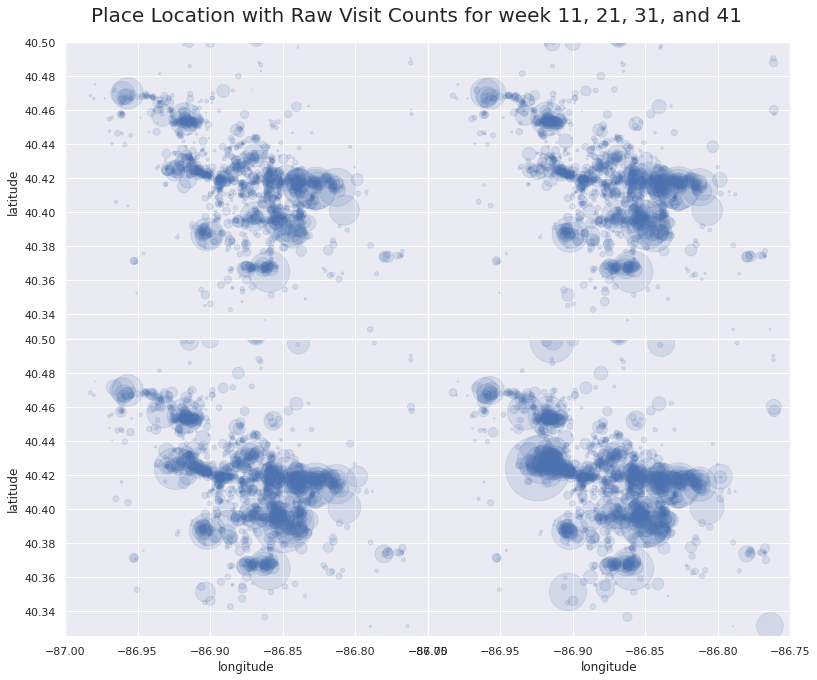

In [29]:
table = pd.pivot_table(wk, values='raw_visit_counts', columns='week_number', index=["latitude",'longitude'], fill_value=0)
table = table.reset_index()

fig, axes = plt.subplots(2,2, sharex=True, sharey=True)
    
table.plot(kind='scatter',ax=axes[0,0], x="longitude", y="latitude", s=table.iloc[:,2], alpha=0.15, figsize=(13,10), xlim = (-87,-86.75), ylim = (40.325,40.5))
table.plot(kind='scatter',ax=axes[0,1], x="longitude", y="latitude", s=table.iloc[:,3], alpha=0.15, xlim = (-87,-86.75), ylim = (40.325,40.5))
table.plot(kind='scatter',ax=axes[1,0], x="longitude", y="latitude", s=table.iloc[:,4], alpha=0.15, xlim = (-87,-86.75), ylim = (40.325,40.5))
table.plot(kind='scatter',ax=axes[1,1], x="longitude", y="latitude", s=table.iloc[:,5], alpha=0.15, xlim = (-87,-86.75), ylim = (40.325,40.5))

fig.suptitle('Place Location with Raw Visit Counts for week 11, 21, 31, and 41',fontsize=20, y=1)
fig.subplots_adjust(wspace=0,hspace=0, top=0.95)

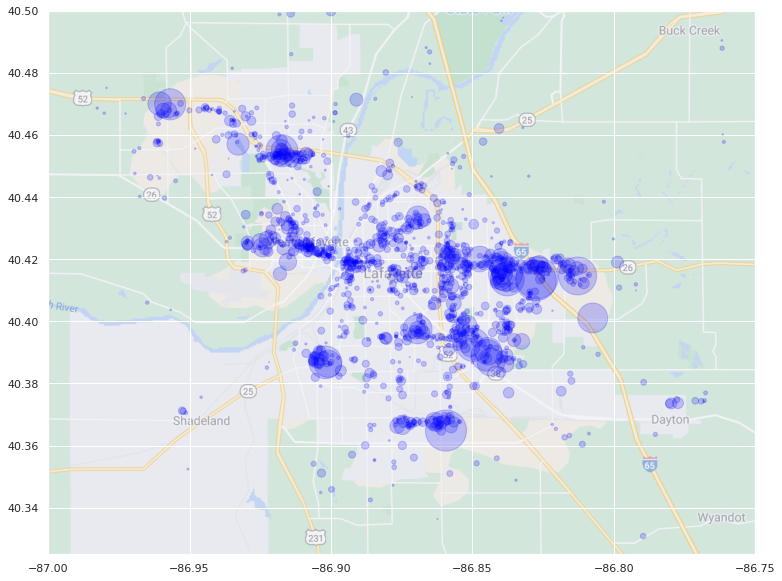

In [30]:
plt.figure(figsize=(13,10))

plt.scatter( x="longitude", y="latitude",data = table, zorder=1, alpha = 0.2, s=table.iloc[:,2], c='blue')
plt.xlim(-87,-86.75)
plt.ylim(40.325,40.5)
img = plt.imread("Capture.PNG")

ext = [-87.008,-86.75, 40.325,40.5]
plt.imshow(img, zorder=0, extent=ext, alpha = 0.5)

aspect=img.shape[0]/float(img.shape[1])*((ext[1]-ext[0])/(ext[3]-ext[2]))
plt.gca().set_aspect(aspect)

plt.show()